# Agenda

> Data: 19/02/2021<br>
> Aula: 08 <br>
> Módulo: 00 <br>


O objetivo dessa aula é introduzir conceitos sobre limpeza de dados e demonstrar alguns tratamentos.

### Limpeza de Dados:

 

In [1]:
import pandas as pd
import numpy as np
#!pip install missingno

# Limpeza de Dados
referência: https://medium.com/turing-talks/como-fazer-uma-limpeza-de-dados-completa-em-python-7abc9dfc19b8

## Por que fazer?

Em muitos casos trabalhamos com dados com inconstâncias,  incorreto, incompleto, duplicado, formatado incorretamente ou até mesmo que seja irrelevante.

* Apenas com dados corretos podemos realizar uma análise completa e confiável, e por consequência, todas as outras etapas que dependem da limpeza e dela, serão feitas corretamente. Afinal, esses erros podem gerar um problema em cascata!

* Você não quer estar no meio da sua análise e descobrir que, por exemplo, na coluna 'valor', existam três tipos de moeda Isso seria um exemplo perfeito de dados incorretos.

* Exemplos assim acontecem frequentemente

### Lendo seu DataFrame e analisando suas FEATURES 

dataset: imóveis vendidos na cidade de Nova York ao longo de um período de 12 meses, de setembro de 2016 a setembro de 2017.


In [2]:
# Carregando os dados
nyc_sales = pd.read_csv('nyc-rolling-sales_twentieth.csv')


In [3]:
nyc_sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


A primeira coisa que observamos é a coluna ```Unnamed: 0```. Devemos removê-la, já que nem nome ela possui. Essa coluna surge geralmente devido a gravação do índice do dataframe como coluna do csv. Se quisermos evitar que um índice de dataframe seja salvo após nossa análise, passamos o parâmetro ```index=False``` para o método ```.to_csv()```.

In [4]:
nyc_sales.drop(columns = ['Unnamed: 0'], axis =0, inplace = True)

In [5]:
nyc_sales.head(100)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,378,1008,,R4,399 EAST 8TH STREET,3B,...,1,0,1,-,-,2014,2,R4,701341,2017-02-14 00:00:00
96,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,378,1009,,R4,399 EAST 8TH STREET,3C,...,1,0,1,-,-,2014,2,R4,-,2017-05-25 00:00:00
97,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,378,1010,,R4,399 EAST 8TH STREET,3D,...,1,0,1,-,-,2014,2,R4,-,2017-07-14 00:00:00
98,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,378,1011,,R4,399 EAST 8TH STREET,4A,...,1,0,1,-,-,2014,2,R4,-,2017-05-25 00:00:00


### Verificando as colunas

In [6]:
nyc_sales.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [7]:
nyc_sales.shape

(16909, 21)

Dando uma olhada nos nomes conseguimos ter uma ideia sobre o que se trata cada uma delas, mas não podemos obter todas as informações, afinal algumas possuem uns nomes bem estranhos. Por isso, podemos pesquisar mais detalhadamente a respeito de cada feature do nosso dataset aqui: https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf

### Verificando os tipos dos dados

In [8]:
nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16909 entries, 0 to 16908
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         16909 non-null  int64 
 1   NEIGHBORHOOD                    16909 non-null  object
 2   BUILDING CLASS CATEGORY         16909 non-null  object
 3   TAX CLASS AT PRESENT            16909 non-null  object
 4   BLOCK                           16909 non-null  int64 
 5   LOT                             16909 non-null  int64 
 6   EASE-MENT                       16909 non-null  object
 7   BUILDING CLASS AT PRESENT       16909 non-null  object
 8   ADDRESS                         16909 non-null  object
 9   APARTMENT NUMBER                16909 non-null  object
 10  ZIP CODE                        16909 non-null  int64 
 11  RESIDENTIAL UNITS               16909 non-null  int64 
 12  COMMERCIAL UNITS                16909 non-null

Conforme a documentação (link acima) podemos identificar que algumas variáveis que são do tipo numérico estão representadas como ```object```:
* ```SALE PRICE```
* ```GROSS SQUARE FEE```
* ```LAND SQUARE FEE```
* ```APARTMENT NUMBER```

Da mesma maneira temos variáveis categóricas que estão como ```int64```:
* ```BOROUGH```
* ```BLOCK```
* ```LOT```
* ```TAX CLASS AT TIME OF SALE```

Inclusive, a própria descrição das variáveis nos revela que podemos utilizar BLOCK da seguinte maneira: Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

### Vamos tentar algumas conversões? Para isso iremos tentar as conversões através do método ```.astype()```

In [9]:
nyc_sales.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

### Convertendo tipo object para float

In [10]:
nyc_sales['SALE PRICE'] = nyc_sales['SALE PRICE'].astype('float32', errors='ignore')#o método identifica o tipo conforme formato do número
# errors = ignore garantem que se tiver algum missing, mesmo assim será convertido

In [11]:
nyc_sales['SALE PRICE']

0        6625000
1            -  
2            -  
3        3936272
4        8000000
          ...   
16904        -  
16905     712500
16906     740000
16907    1800000
16908        -  
Name: SALE PRICE, Length: 16909, dtype: object

### Não houve conversão, pois existe um ```-``` no meio das colunas. Isso é um indício de que valores faltosos são representados dessa maneira no nosso dataframe.

Vamos usar outro método: ```pd.to_nummeric```.

In [12]:
nyc_sales['SALE PRICE'] = pd.to_numeric(nyc_sales['SALE PRICE'],downcast='float', errors='coerce') #posso especificar o type com o parmentro downcast='float'
nyc_sales['SALE PRICE']

0        6625000.0
1              NaN
2              NaN
3        3936272.0
4        8000000.0
           ...    
16904          NaN
16905     712500.0
16906     740000.0
16907    1800000.0
16908          NaN
Name: SALE PRICE, Length: 16909, dtype: float32

### Vamos usar um for para converter as demais


In [13]:
for item in ['GROSS SQUARE FEET', 'LAND SQUARE FEET', 'APARTMENT NUMBER']: #minha lista de colunas
    nyc_sales[item] = pd.to_numeric(nyc_sales[item], errors='coerce')

In [14]:
nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16909 entries, 0 to 16908
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         16909 non-null  int64  
 1   NEIGHBORHOOD                    16909 non-null  object 
 2   BUILDING CLASS CATEGORY         16909 non-null  object 
 3   TAX CLASS AT PRESENT            16909 non-null  object 
 4   BLOCK                           16909 non-null  int64  
 5   LOT                             16909 non-null  int64  
 6   EASE-MENT                       16909 non-null  object 
 7   BUILDING CLASS AT PRESENT       16909 non-null  object 
 8   ADDRESS                         16909 non-null  object 
 9   APARTMENT NUMBER                1156 non-null   float64
 10  ZIP CODE                        16909 non-null  int64  
 11  RESIDENTIAL UNITS               16909 non-null  int64  
 12  COMMERCIAL UNITS                

In [15]:
nyc_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,NaN,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,NaN,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,NaN,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,NaN,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,NaN,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


Perceba que agora aparecem valores NaN no nosso dataframe. Lembrando que não temos mais o sinal - 

o NaN =  significa Not a Number, é um valor especial definido no numpy que pode decodificar um valor faltante, mas ainda assim ser lido como um numeral, pois é definido como float.

### AS variáveis categóricas que estão como inteiro iremos converter para ```object```.

In [16]:
for item in ['BLOCK', 'LOT', 'TAX CLASS AT TIME OF SALE' ]:
    nyc_sales[item] =  nyc_sales[item] .astype('object')

In [17]:
nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16909 entries, 0 to 16908
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         16909 non-null  int64  
 1   NEIGHBORHOOD                    16909 non-null  object 
 2   BUILDING CLASS CATEGORY         16909 non-null  object 
 3   TAX CLASS AT PRESENT            16909 non-null  object 
 4   BLOCK                           16909 non-null  object 
 5   LOT                             16909 non-null  object 
 6   EASE-MENT                       16909 non-null  object 
 7   BUILDING CLASS AT PRESENT       16909 non-null  object 
 8   ADDRESS                         16909 non-null  object 
 9   APARTMENT NUMBER                1156 non-null   float64
 10  ZIP CODE                        16909 non-null  int64  
 11  RESIDENTIAL UNITS               16909 non-null  int64  
 12  COMMERCIAL UNITS                

## map()


* Usado para substituir cada valor em uma Série por outro valor, que pode ser derivado de uma função, um dicionário ou uma Série.

* mapeará elementos com base nas chaves desse dicionário / série. Os valores ausentes serão registrados como NaN na saída.

Para as variável BOROUGH, vamos seguir as recomendações da "documentação"


In [18]:
#documentação informa que: Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
nyc_sales['BOROUGH'] = nyc_sales['BOROUGH'].map({1:'Manhatan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'})

In [19]:
nyc_sales.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,NaN,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,NaN,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00


Compare com o df antes da transformação

Por fim, temos a coluna ```SALE DATE``` que é uma data, mas que está como string. Vamos convertê-la para data usando a função ```pd.to_datetime```

In [20]:
nyc_sales['SALE DATE'] = pd.to_datetime(nyc_sales['SALE DATE'], format='%Y-%m-%d')

In [21]:
nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16909 entries, 0 to 16908
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         16909 non-null  object        
 1   NEIGHBORHOOD                    16909 non-null  object        
 2   BUILDING CLASS CATEGORY         16909 non-null  object        
 3   TAX CLASS AT PRESENT            16909 non-null  object        
 4   BLOCK                           16909 non-null  object        
 5   LOT                             16909 non-null  object        
 6   EASE-MENT                       16909 non-null  object        
 7   BUILDING CLASS AT PRESENT       16909 non-null  object        
 8   ADDRESS                         16909 non-null  object        
 9   APARTMENT NUMBER                1156 non-null   float64       
 10  ZIP CODE                        16909 non-null  int64         
 11  RE

## Investigação de Inconsistências

In [22]:
nyc_sales

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,NaN,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,NaN,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,NaN,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,NaN,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,NaN,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16904,Manhatan,UPPER WEST SIDE (79-96),10 COOPS - ELEVATOR APARTMENTS,2,1237,29,,D4,"201 WEST 89TH STREET, 9A",NaN,...,0,0,0,NaN,NaN,1925,2,D4,NaN,2017-02-08
16905,Manhatan,UPPER WEST SIDE (79-96),10 COOPS - ELEVATOR APARTMENTS,2,1237,29,,D4,"201 WEST 89TH STREET, 10C",NaN,...,0,0,0,NaN,NaN,1925,2,D4,712500.0,2017-02-13
16906,Manhatan,UPPER WEST SIDE (79-96),10 COOPS - ELEVATOR APARTMENTS,2,1237,29,,D4,"201 WEST 89 ST, 10D",NaN,...,0,0,0,NaN,NaN,1925,2,D4,740000.0,2017-02-13
16907,Manhatan,UPPER WEST SIDE (79-96),10 COOPS - ELEVATOR APARTMENTS,2,1237,29,,D4,"201 WEST 89TH STREET, 7G",NaN,...,0,0,0,NaN,NaN,1925,2,D4,1800000.0,2017-04-27


* Distribuição do dia do mês para checar a conversão de data
Um dos grandes perigos na conversão de datas é misturar os meses e dias. A função to_datetime() ajuda muito com as mensagens de erro, mesmo assim é boa ideia checar novamente se os dias dos meses extraídos fazem sentido.
Para fazer isso é possível fazer um gráfico de histograma com os dias do mês. É esperado termos valores distribuídos uniformemente entre 1 e 31, uma vez que não há razão que um dia seja mais comum que outro (exceto 31, pois nem todos os meses tem 31 dias).

C:\Users\Tecnologia\anaconda3\envs\DH\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE DATE'>

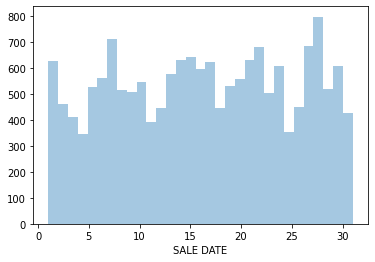

In [23]:
import seaborn as sns
day_of_month = nyc_sales['SALE DATE'].dt.day
day_of_month = day_of_month.dropna()
sns.distplot(day_of_month, kde=False, bins=31)

### Outilier


<AxesSubplot:xlabel='YEAR BUILT'>

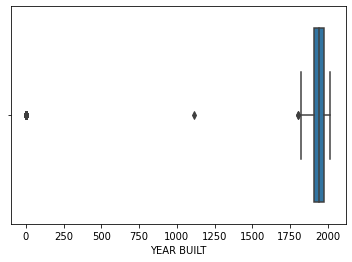

In [24]:
sns.boxplot(x=nyc_sales['YEAR BUILT'])

* O gráfico acima mostra ponto o ponto no valor 0, outro  entre  1000 a 1250 e outro próximo a 1800,estes são outliers, pois não estão incluídos na caixa de outra observação. Podem atrapalhar!

* primeiro passo para saber se um dado é ou não um outlier é o bom senso.
Isso pode parecer um pouco vago em determinados casos, porém o bom senso é o primeiro caminho que você deve tomar ao abrir um novo dataset, sendo assim é crucial conhecer a história por trás dos seus dados, seja de onde ele foi retirado, as fontes por trás, até talvez qual o parâmetro de medição de alguma feature. Pesquisar sobre o assunto que você está trabalhando também é um trabalho importante para um data scientist.

### Eliminando os outiliers

#### Verificando os pontos que encontramos

In [25]:
t1 = nyc_sales[(nyc_sales["YEAR BUILT"] == 0 )]
t1

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
74,Manhatan,ALPHABET CITY,11A CONDO-RENTALS,,394,1602,,,183-189 AVENUE B,NaN,...,0,0,0,NaN,NaN,0,2,RR,8058923.0,2017-08-09
76,Manhatan,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,386,1002,,R2,211 EAST 3RD STREET,NaN,...,1,0,1,NaN,NaN,0,2,R2,620000.0,2016-12-30
77,Manhatan,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,398,1039,,R2,182 EAST 2ND STREET,NaN,...,1,0,1,NaN,NaN,0,2,R2,NaN,2017-02-24
78,Manhatan,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,405,1211,,R2,511 EAST 11TH STREET,NaN,...,1,0,1,NaN,NaN,0,2,R2,NaN,2017-07-20
87,Manhatan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,375,1004,,R4,754 EAST 6TH STREET,NaN,...,1,0,1,NaN,NaN,0,2,R4,875000.0,2017-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16487,Manhatan,UPPER WEST SIDE (59-79),47 CONDO NON-BUSINESS STORAGE,4,1171,1963,,RS,220 RIVERSIDE BOULEVARD,161.0,...,0,0,1,NaN,NaN,0,4,RS,NaN,2016-12-12
16488,Manhatan,UPPER WEST SIDE (59-79),47 CONDO NON-BUSINESS STORAGE,4,1171,1978,,RS,220 RIVERSIDE BOULEVARD,178.0,...,0,0,1,NaN,NaN,0,4,RS,40000.0,2016-09-28
16489,Manhatan,UPPER WEST SIDE (59-79),47 CONDO NON-BUSINESS STORAGE,4,1171,2023,,RS,220 RIVERSIDE BOULEVARD,NaN,...,0,0,1,NaN,NaN,0,4,RS,23500.0,2016-09-28
16503,Manhatan,UPPER WEST SIDE (59-79),47 CONDO NON-BUSINESS STORAGE,4,1171,3282,,RS,120 RIVERSIDE BOULEVARD,NaN,...,0,0,1,NaN,NaN,0,4,RS,20000.0,2017-06-07


In [26]:
t2 = nyc_sales[(nyc_sales["YEAR BUILT"] >= 1000 ) & (nyc_sales["YEAR BUILT"] <= 1200 )]
t2

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
957,Manhatan,CHELSEA,29 COMMERCIAL GARAGES,4,799,70,,G6,7 AVENUE,NaN,...,0,0,0,2125.0,NaN,1111,4,G6,8208750.0,2017-04-21


In [27]:
t3 =  nyc_sales[(nyc_sales["YEAR BUILT"] >= 1700 ) & (nyc_sales["YEAR BUILT"] <= 1850 )]
t3

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
246,Manhatan,CHELSEA,09 COOPS - WALKUP APARTMENTS,2C,720,34,,C6,"429 WEST 22ND STREET, 4-G",NaN,...,0,0,0,NaN,NaN,1850,2,C6,1750000.0,2017-01-25
275,Manhatan,CHELSEA,09 COOPS - WALKUP APARTMENTS,2,744,18,,C6,"337 WEST 20TH STREET, 4M",NaN,...,0,0,0,NaN,NaN,1850,2,C6,1100000.0,2017-05-12
277,Manhatan,CHELSEA,09 COOPS - WALKUP APARTMENTS,2,744,32,,C6,309 WEST 20TH STREET,NaN,...,24,0,24,4600.0,12200.0,1850,2,C6,282000.0,2016-10-19
278,Manhatan,CHELSEA,09 COOPS - WALKUP APARTMENTS,2,744,32,,C6,"309 WEST 20TH STREET, 4R",NaN,...,0,0,0,NaN,NaN,1850,2,C6,710000.0,2016-09-23
279,Manhatan,CHELSEA,09 COOPS - WALKUP APARTMENTS,2,744,32,,C6,"309 WEST 20TH STREET, BSMNT",NaN,...,0,0,0,NaN,NaN,1850,2,C6,282000.0,2016-10-19
2521,Manhatan,FINANCIAL,13 CONDOS - ELEVATOR APARTMENTS,2,72,1008,,R4,170 JOHN STREET,NaN,...,1,0,1,NaN,NaN,1840,2,R4,NaN,2017-01-04
3578,Manhatan,GREENWICH VILLAGE-CENTRAL,09 COOPS - WALKUP APARTMENTS,2,575,72,,C6,"45 WEST 11TH STREET, 4C",NaN,...,0,0,0,NaN,NaN,1846,2,C6,1300000.0,2016-11-03
6697,Manhatan,LITTLE ITALY,01 ONE FAMILY DWELLINGS,1,471,2,,A4,2 CENTRE MARKET PLACE,NaN,...,1,0,1,1016.0,3700.0,1800,1,A4,7090000.0,2017-03-09
6935,Manhatan,LOWER EAST SIDE,12 CONDOS - WALKUP APARTMENTS,2,354,1002,,R2,133 NORFOLK STREET,NaN,...,1,0,1,NaN,NaN,1800,2,R2,NaN,2016-12-06
10573,Manhatan,SOHO,01 ONE FAMILY DWELLINGS,1,578,64,,A4,32 DOMINICK STREET,NaN,...,1,0,1,1700.0,1699.0,1826,1,A4,NaN,2017-07-31


### Vou remover  os 3 filtros analisados do meu dataframe

In [28]:
#Resumindo: quero só valores acima de 1800
nyc_sales = nyc_sales[(nyc_sales["YEAR BUILT"] >=1850 )]


<AxesSubplot:xlabel='YEAR BUILT'>

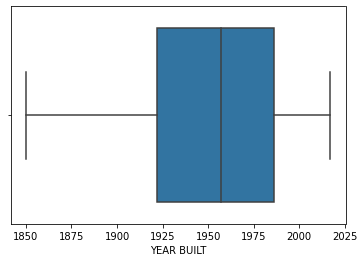

In [29]:
sns.boxplot(x=nyc_sales['YEAR BUILT'])

In [30]:
nyc_sales.shape

(14723, 21)

### Colunas desnecessárias

* Algumas colunas podem ser consideradas desnecessárias para nossa análise, isso porque elas não nos passam informações relevantes a respeito do que queremos descobrir

* Você não precisa usar todas as fetures disponíveis 

## Tratar dados faltantes

### Origem

Os dados faltosos podem ter diversas origens:
* Erros de inserção (erro em banco)
* Erros humanos
* Erros de medição (sensores)
* Falhas em Equipamentos

### Tratamento

Quando um dado faltoso surge por meio de um join numa tabela, quase sempre conseguimos preencher o dado faltoso com um valor que faz sentido.
Ex.: Saque de conta. Nem todos os clientes fazem saque em um mês. Dessa forma, podemos preencher o valor faltoso na coluna de saque para um cliente que não realizou saque como 0.

Quase nunca a opção de deletar tudo é a melhor, pois podem surgir alguns problemas, como:
* Introdução de Viés
* Perda de informação

Alguns métodos de tratamento de dados faltosos:
* Deleção
* Preenchimento com estatísticas (moda para categóricos, mediana ou média para numéricos)
* Preenchimento por meio de um modelo (KNN, Árvore de Decisão)
* Preenchimento com regra de negócio

Algumas boas práticas:
* Criar Null Categórico para a coluna (funciona para numéricas e categóricas)
* Não fazer dropna de cara.

### Como identificar null em colunas


In [31]:
nyc_sales.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                  13757
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  13082
GROSS SQUARE FEET                 13106
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                         2831
SALE DATE                             0
dtype: int64

Lembre do tamanho do noso dataframe e comparare a quantidade de dados faltantes

## Uma opção é deletar todas as linhas com dados faltantes. Nesse caso seria uma boa opção??

Opções de Tratamento:
* Deletar as colunas e Apartment Number, Land Square Feet e Gross Square Feet  e acrescentar uma coluna Null Categórica.
* Manter a coluna e categorizar (faixas de valores), acrescentando o Null Categórico 

In [32]:
nyc_sales['IS_NULL_APARTMENT_NUMBER'] = False #crio coluna com valor booleano
nyc_sales.loc[nyc_sales['APARTMENT NUMBER'].isnull(), 'IS_NULL_APARTMENT_NUMBER'] = True #nas linhas com valor nulo para coluna 'APARTMENT NUMBER' insira True na mesma linha para a coluna 'IS_NULL_APARTMENT_NUMBER'

<ipython-input-32-bb10bd89ce8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_sales['IS_NULL_APARTMENT_NUMBER'] = False #crio coluna com valor booleano
C:\Users\Tecnologia\anaconda3\envs\DH\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [33]:
nyc_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,IS_NULL_APARTMENT_NUMBER
0,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,NaN,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,True
1,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,NaN,...,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,True
2,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,NaN,...,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,True
3,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,NaN,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,True
4,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,NaN,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,True


### Preenchimento de dados -  fillna()

Uma opção é substituir esses dados pela média da coluna, entretanto, às vezes, a média pode ter sido afetada pelos valores destoantes da coluna, então podemos substituir também pela moda ou mediana. Podemos fazer isso com a função .fillna

In [34]:
df = pd.DataFrame({
                   'A': [80, np.nan, np.nan, np.nan],
                   'B': [80, np.nan, 76, 67]
                  })
df

,A,B
0,80.0,80.0
1,NaN,NaN
2,NaN,76.0
3,NaN,67.0


Preencher todos valores faltantes com zero

In [35]:
df.fillna(0)

,A,B
0,80.0,80.0
1,0.0,0.0
2,0.0,76.0
3,0.0,67.0


## Preencher com o valor da media da coluna

In [36]:
 df['B'].fillna(df['B'].mean())

0    80.000000
1    74.333333
2    76.000000
3    67.000000
Name: B, dtype: float64

In [37]:
# fill na com forward fill (pega o valor presente  e replica para o próximos nulos abaixo dele)
df['A'].fillna(method='ffill') #ou bfill (backward - pega o valor presente  e replica para o próximos nulos acima dele)

0    80.0
1    80.0
2    80.0
3    80.0
Name: A, dtype: float64

## * Exercício: Faça uma função ou código para filtrar as colunas que estejam preechidas com pelo menos 60% de dados não-nulos

#### Tempo para pesquisar

In [275]:
df.dropna(thresh=1, axis=1) # A coluna tem que ter pelo menos um valor não-nulo para sobreviver

,A,B
0,80.0,80.0
1,NaN,NaN
2,NaN,76.0
3,NaN,67.0


In [276]:
frac = len(df) * 0.6 # (60% da minha base deve ser não nula) - num de linhas (pode ser df.shape[0]) * percentual aceitável
print(len(df))
print(frac)


4
2.4


In [277]:
df.dropna(thresh=frac, axis=1)# 60% das colunas deve ser não nula para que ela sobreviva

,B
0,80.0
1,NaN
2,76.0
3,67.0


# Análise de Duplicatas

Duplicatas são registros iguais em sua totalidade ou em um conjunto específico de colunas. Além disso, também podemos ter colunas equivalentes e duplicadas em nosso dataset que não queremos manter, pois gera redundância. E num eventual processo de treinamento de modelo de machine learning isso pode levar superestimação da  performance.

### Para remover duplicatas utilizamos a função ```drop_duplicates()```

### também requer inplace = True

In [38]:
# Sem passar nada ele observa se há correspondência exata entre alguma linha e mantém só a primeira linha que ele achou
nyc_sales.drop_duplicates(keep='first')
# podemos ter keep=last (mantém a última linha) ou keep = False (não mantém nenhuma)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,IS_NULL_APARTMENT_NUMBER
0,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,NaN,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,True
1,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,NaN,...,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,True
2,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,NaN,...,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,True
3,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,NaN,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,True
4,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,NaN,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16904,Manhatan,UPPER WEST SIDE (79-96),10 COOPS - ELEVATOR APARTMENTS,2,1237,29,,D4,"201 WEST 89TH STREET, 9A",NaN,...,0,0,NaN,NaN,1925,2,D4,NaN,2017-02-08,True
16905,Manhatan,UPPER WEST SIDE (79-96),10 COOPS - ELEVATOR APARTMENTS,2,1237,29,,D4,"201 WEST 89TH STREET, 10C",NaN,...,0,0,NaN,NaN,1925,2,D4,712500.0,2017-02-13,True
16906,Manhatan,UPPER WEST SIDE (79-96),10 COOPS - ELEVATOR APARTMENTS,2,1237,29,,D4,"201 WEST 89 ST, 10D",NaN,...,0,0,NaN,NaN,1925,2,D4,740000.0,2017-02-13,True
16907,Manhatan,UPPER WEST SIDE (79-96),10 COOPS - ELEVATOR APARTMENTS,2,1237,29,,D4,"201 WEST 89TH STREET, 7G",NaN,...,0,0,NaN,NaN,1925,2,D4,1800000.0,2017-04-27,True


In [39]:
# O parâmetro subset nos da a liberdade de procurar duplicatas apenas em um conjunto de colunas
nyc_sales.drop_duplicates(subset= ['BOROUGH','NEIGHBORHOOD'])
# podemos ter keep=last (mantém a última linha) ou keep = False (não mantém nenhuma)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,IS_NULL_APARTMENT_NUMBER
0,Manhatan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,NaN,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,True
204,Manhatan,CHELSEA,01 ONE FAMILY DWELLINGS,1,766,13,,A9,251 WEST 16TH STREET,NaN,...,0,1,1360.0,2736.0,1910,1,A9,NaN,2017-01-06,True
1007,Manhatan,CHINATOWN,07 RENTALS - WALKUP APARTMENTS,2,162,15,,C7,28 MOTT STREET,NaN,...,1,18,2307.0,8577.0,1920,2,C7,NaN,2017-06-16,True
1122,Manhatan,CIVIC CENTER,07 RENTALS - WALKUP APARTMENTS,2B,175,19,,C7,41 WHITE STREET,NaN,...,1,8,2633.0,12000.0,1915,2,C7,141500000.0,2017-07-13,True
1445,Manhatan,CLINTON,07 RENTALS - WALKUP APARTMENTS,2,1053,4,,C7,602 10TH AVENUE,NaN,...,1,15,2217.0,9475.0,1910,2,C7,NaN,2016-11-04,True
1791,Manhatan,EAST VILLAGE,02 TWO FAMILY DWELLINGS,1,436,1,,S2,138 1 AVENUE,NaN,...,1,3,1200.0,3360.0,1900,1,S2,3000000.0,2017-08-31,True
1969,Manhatan,FASHION,07 RENTALS - WALKUP APARTMENTS,2,762,17,,C4,331 WEST 38TH STREET,NaN,...,2,18,2475.0,9690.0,1920,2,C4,NaN,2016-12-23,True
2090,Manhatan,FINANCIAL,08 RENTALS - ELEVATOR APARTMENTS,2,27,9,,D5,63 WALL STREET,NaN,...,6,482,17623.0,400531.0,1929,2,D5,239114608.0,2016-09-30,True
2586,Manhatan,FLATIRON,08 RENTALS - ELEVATOR APARTMENTS,2,844,8,,D6,9 EAST 16TH STREET,NaN,...,1,16,4600.0,30680.0,1900,2,D6,NaN,2017-01-30,True
3059,Manhatan,GRAMERCY,02 TWO FAMILY DWELLINGS,1,873,31,,S2,141 EAST 17TH STREET,NaN,...,1,3,2300.0,6720.0,1920,1,S2,5300000.0,2017-08-03,True


## Remoção de Colunas Constantes

Uma coluna constante não agrega em informação para nenhuma análise. Geralmente excluímos.

In [40]:
# podemos varrer as colunas com um foor lop e identificar quais colunas possuem apenas um valor possível de preenchimento
colunas_constantes = []
for col in nyc_sales.columns:
    if len(nyc_sales[col].unique()) == 1:    #retorno booleano
        colunas_constantes.append(col)
    else:
        print(f'{col} OK')

NEIGHBORHOOD OK
BUILDING CLASS CATEGORY OK
TAX CLASS AT PRESENT OK
BLOCK OK
LOT OK
BUILDING CLASS AT PRESENT OK
ADDRESS OK
APARTMENT NUMBER OK
ZIP CODE OK
RESIDENTIAL UNITS OK
COMMERCIAL UNITS OK
TOTAL UNITS OK
LAND SQUARE FEET OK
GROSS SQUARE FEET OK
YEAR BUILT OK
TAX CLASS AT TIME OF SALE OK
BUILDING CLASS AT TIME OF SALE OK
SALE PRICE OK
SALE DATE OK
IS_NULL_APARTMENT_NUMBER OK


In [41]:
colunas_constantes

['BOROUGH', 'EASE-MENT']

## Remoção Por baixa variância

Variância é uma medida do quão espalhados estão os seus dados ao redor da média.

<img src="https://www.portalaction.com.br/sites/default/files/resize/EstatisticaBasica/figuras/ebe2.2-650x132.png" height=350 widht=150>

Os dados do conjunto 2 estão mais dispersos e, dessa maneira, dizemos que este possui maior variância em relação ao primeiro conjunto.

Quando coletamos dados para utilizar em um modelo de machine learning, é interessante que eles possuam um nível mínimo de variância. Dessa forma, iremos filtrar colunas cuja variância seja muito próxima de zero (lembre-se de que já eliminamos aquelas que possuíam todos os elementos iguais).

O conjunto 1 abaixo possui um único valor diferente (6) que varia 1 unidade em relação aos demais.  O conjunto 2, por sua vez, também possui apenas um valor diferente dos demais (600) e 100 unidades a mais que os demais. Proporcionalmente, os dois conjuntos variam na mesma escala. Mas pelo cálculo da variância, elas são diferentes.

Vamos demonstrar como remover colunas (variáveis com baixa variância) do dataset.

Antes de tudo nós precisamos escalar nossos dados antes de calcular a variância. Vamos fazer isso utilizando o MinMaxScaler do Scikit-Learn.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/min-max-normalisation.jpg" heigh=350 width=350>

In [42]:
conjunto_dados_1 = np.array([5,5,6,5,5])
conjunto_dados_1.mean()

5.2

In [43]:
conjunto_dados_2 = np.array([500, 500, 600, 500, 500])
conjunto_dados_2.mean()

520.0

In [44]:
np.std(conjunto_dados_1)

0.39999999999999997

In [45]:
np.std(conjunto_dados_2)

40.0

In [49]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
conjunto_dados_1_escalado = minmax.fit_transform(conjunto_dados_1.reshape(-1,1))
conjunto_dados_2_escalado = minmax.fit_transform(conjunto_dados_2.reshape(-1,1))

In [50]:
conjunto_dados_1_escalado

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [51]:
np.var(conjunto_dados_1_escalado) #variância

0.16000000000000006

In [52]:
conjunto_dados_2_escalado

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [53]:
np.var(conjunto_dados_2_escalado)

0.16000000000000006

# Verificando variância das colunas numéricas

In [60]:
variaveis_numericas_nyc = nyc_sales.select_dtypes(include=['int', 'float'])
variaveis_numericas_escaladas_nyc = minmax.fit_transform(variaveis_numericas_nyc)

In [61]:
variaveis_numericas_escaladas_nyc = pd.DataFrame(variaveis_numericas_escaladas_nyc, columns=variaveis_numericas_nyc.columns)

Não queremos variância muito próximas de zero, então vamos filtrar variancia > 0.001

In [56]:
np.var(variaveis_numericas_escaladas_nyc['LAND SQUARE FEET']) >0.001


True

In [57]:
np.var(variaveis_numericas_escaladas_nyc['GROSS SQUARE FEET'])  >0.001



True

#### Ou usar um for para percorrer as colunas muméricas

In [62]:
listLowVariance = []
for col in variaveis_numericas_escaladas_nyc.columns:
    if np.var(variaveis_numericas_escaladas_nyc[col]) > 0.001:
        print(f'{col} possui variância considerável')
    else:
        print(f'{col} possui baixa variância')
        listLowVariance.append(col)

APARTMENT NUMBER possui variância considerável
LAND SQUARE FEET possui variância considerável
GROSS SQUARE FEET possui variância considerável


In [63]:
listLowVariance

[]